In [10]:
import torch
from torch import nn
import torch.optim as optim

import matplotlib.pyplot as plt

In [32]:
net = nn.Linear(10, 1)

cosine = optim.lr_scheduler.CosineAnnealingLR(
    optim.AdamW(net.parameters(), lr=0.1), T_max=100
)
onecycle = optim.lr_scheduler.OneCycleLR(
    optim.AdamW(net.parameters(), lr=0.1),
    max_lr=0.1,
    steps_per_epoch=1,
    epochs=100,
)
cyclic = optim.lr_scheduler.CyclicLR(
    optim.AdamW(net.parameters(), lr=0.1),
    base_lr=0.001,
    max_lr=0.1,
    step_size_up=10,
    cycle_momentum=False,
    mode="triangular",
    last_epoch=-1,
)

In [33]:
# Plot the learning rate schedule
cosine_lrs = []
onecycle_lrs = []
cyclic_lrs = []

for i in range(100):
    cosine.step()
    onecycle.step()
    cyclic.step()

    cosine_lrs.append(cosine.get_last_lr()[0])
    onecycle_lrs.append(onecycle.get_last_lr()[0])
    cyclic_lrs.append(cyclic.get_last_lr()[0])

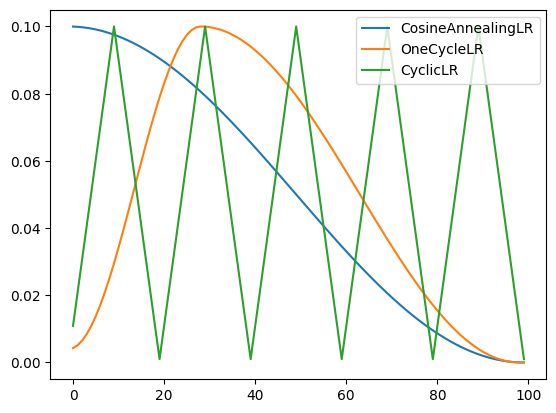

In [34]:
plt.plot(cosine_lrs, label="CosineAnnealingLR")
plt.plot(onecycle_lrs, label="OneCycleLR")
plt.plot(cyclic_lrs, label="CyclicLR")
plt.legend()